# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import today's date in mm/dd/yyyy format
today = date.today()
today = today.strftime("%m/%d/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [81]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        #city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    city_url = url + "&q=" + city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | sinnamary
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | gurlan
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | ballina
Processing Record 12 of Set 1 | russell
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | popondetta
Processing Record 15 of Set 1 | lolua
City not found. Skipping...
Processing Record 16 of Set 1 | morondava
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | poya
Processing Record 20 of Set 1 | palembang
Processing Record 21 of Set 1 | banyo
Processing Record 22 of Set 1 | san angelo
Proces

Processing Record 38 of Set 4 | iqaluit
Processing Record 39 of Set 4 | ivangorod
Processing Record 40 of Set 4 | neiafu
Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | juifang
City not found. Skipping...
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | buqayq
City not found. Skipping...
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | manokwari
Processing Record 48 of Set 4 | ksenyevka
City not found. Skipping...
Processing Record 49 of Set 4 | pakaur
Processing Record 0 of Set 5 | yaizu
Processing Record 1 of Set 5 | los llanos de aridane
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | lavrentiya
Processing Record 5 of Set 5 | kilindoni
Processing Record 6 of Set 5 | matara
Processing Record 7 of Set 5 | pochutla
Processing Record 8 of Set 5 | mbalmayo
Processing Record 9 of Set 5 | nguiu
City not found. Skippi

Processing Record 27 of Set 8 | upernavik
Processing Record 28 of Set 8 | san felipe
Processing Record 29 of Set 8 | vostok
Processing Record 30 of Set 8 | baihar
Processing Record 31 of Set 8 | cabo san lucas
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | jackson
Processing Record 34 of Set 8 | talikota
Processing Record 35 of Set 8 | dryden
Processing Record 36 of Set 8 | boende
Processing Record 37 of Set 8 | natchez
Processing Record 38 of Set 8 | lamar
Processing Record 39 of Set 8 | san quintin
Processing Record 40 of Set 8 | keshan
City not found. Skipping...
Processing Record 41 of Set 8 | chara
Processing Record 42 of Set 8 | gwadar
Processing Record 43 of Set 8 | burica
City not found. Skipping...
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | kyra
Processing Record 46 of Set 8 | dinguiraye
Processing Record 47 of Set 8 | ascension
Processing Record 48 of Set 8 | clyde river
Processing Record 49 of Set 8 | mount isa
Pro

Processing Record 12 of Set 12 | uyemskiy
Processing Record 13 of Set 12 | talnakh
Processing Record 14 of Set 12 | dera din panah
City not found. Skipping...
Processing Record 15 of Set 12 | huarmey
Processing Record 16 of Set 12 | lokosovo
Processing Record 17 of Set 12 | vaitape
Processing Record 18 of Set 12 | aguimes
Processing Record 19 of Set 12 | chulman
Processing Record 20 of Set 12 | linjiang
Processing Record 21 of Set 12 | nantucket
Processing Record 22 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 23 of Set 12 | alpena
Processing Record 24 of Set 12 | puerto carreno
Processing Record 25 of Set 12 | teknaf
Processing Record 26 of Set 12 | sabang
Processing Record 27 of Set 12 | ponta delgada
Processing Record 28 of Set 12 | manaus
Processing Record 29 of Set 12 | orumiyeh
Processing Record 30 of Set 12 | vanavara
Processing Record 31 of Set 12 | hajnowka
Processing Record 32 of Set 12 | kerki
City not found. Skipping...
Processing Record 33 of Set 12 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [83]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [84]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,77.49,81,5,15.77,PF,1610408207
1,ribeira grande,38.5167,-28.7000,62.53,89,100,20.11,PT,1610408207
2,rikitea,-23.1203,-134.9692,78.40,77,95,18.39,PF,1610408208
3,vila velha,-20.3297,-40.2925,79.00,83,75,10.36,BR,1610408208
4,sinnamary,5.3833,-52.9500,77.68,85,43,12.62,GF,1610408208


In [85]:
#Extract
lats = city_data_pd["Lat"]
max_temp =city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
city_data_pd.to_csv(output_data_file, index_label = "City_ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [86]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,20.857203,17.672444,47.347066,75.341328,55.214022,8.381587,1.610408e+09
std,33.285161,93.427057,32.067676,18.023083,38.533495,6.040464,6.857037e+01
min,-54.800000,-179.166700,-43.940000,1.000000,0.000000,0.540000,1.610408e+09
25%,-7.275525,-67.496475,27.075000,67.250000,18.000000,3.677500,1.610408e+09
50%,26.644050,20.208700,57.000000,80.000000,75.000000,6.910000,1.610408e+09
75%,48.906275,100.047650,73.970000,88.000000,90.000000,11.500000,1.610408e+09
max,78.218600,179.316700,92.370000,100.000000,100.000000,37.780000,1.610408e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

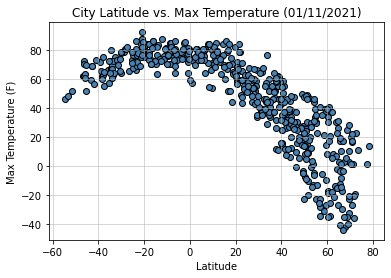

In [87]:
#Create plot
plt.scatter(lats, max_temp, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Max Temp.png")
plt.show()

City Latitude vs. Max Temperature plot shows the maximum temperature recorded at the latitude of the city it was taken from.

## Latitude vs. Humidity Plot

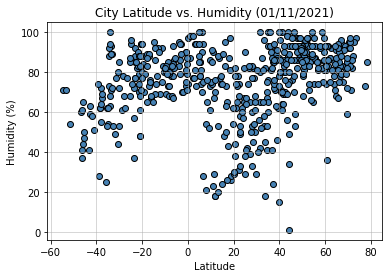

In [88]:
#Create plot
plt.scatter(lats, humidity, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Humidity.png")

City Latitude vs. Humidity plot shows the humidity percentage recorded at the latitude of the city it was taken from.

## Latitude vs. Cloudiness Plot

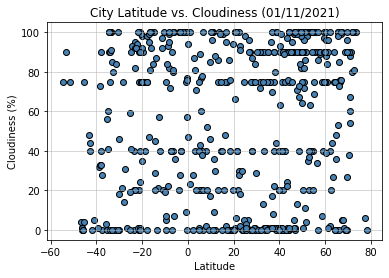

In [89]:
#Create plot
plt.scatter(lats, cloudiness, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Cloudiness.png")

City Latitude vs. Cloudiness plot shows the cloudiness percentage recorded at the latitude of the city it was taken from.

## Latitude vs. Wind Speed Plot

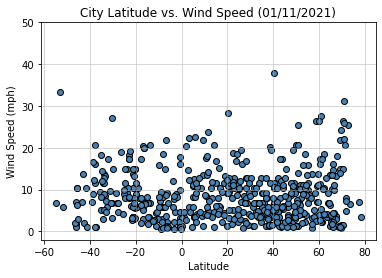

In [90]:
#Create plot
plt.scatter(lats,wind_speed, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,50)
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Wind Speed.png")

City Latitude vs. Wind Speed plot shows the wind speed recorded in miles per hour at the latitude of the city it was taken from.

## Linear Regression

In [91]:
#Create northern and southern hemisphere dataframes
northern_hemisphere = city_data_pd[city_data_pd["Lat"] >= 0]
southern_hemisphere = city_data_pd[city_data_pd["Lat"] < 0]

#Define functions for linear regression and scatter plot
def linear_regression(x,y,title,text_coordinates):
    print(f"The r-squared is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))
    plt.scatter(x,y, alpha=0.5, edgecolor='black')
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue ** 2}")
    print(f"The line equation is: {line_eq}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.84
The r-value is: 0.7110787712011183
The line equation is: y = -1.36x = 88.96


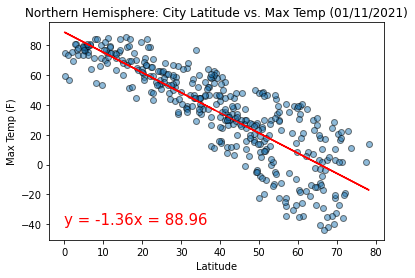

<Figure size 432x288 with 0 Axes>

In [104]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Max Temp"]
plt.title(f'Northern Hemisphere: City Latitude vs. Max Temp ({today})')
linear_regression(x,y,'Max Temp (F)',(0,-40))

plt.savefig("output_data/Northern_MaxTempVsLat_Regression.png")

There is a strong negative correlation of higher temperatures at latitudes closer to the equator and cooler temperatures as you increase north. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.61
The r-value is: 0.3689847445134636
The line equation is: y = 0.38x = 82.59


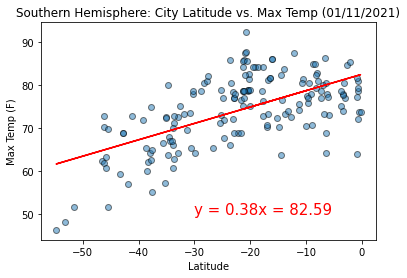

<Figure size 432x288 with 0 Axes>

In [105]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Max Temp"]
plt.title(f'Southern Hemisphere: City Latitude vs. Max Temp ({today})')
linear_regression(x,y,'Max Temp (F)',(-30,50))
plt.savefig("output_data/ Southern Max Temp Linear Regression.png")

There is a moderate positive correlation of the temperature decreasing the farther south from the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.35
The r-value is: 0.12519544669991578
The line equation is: y = 0.35x = 62.0


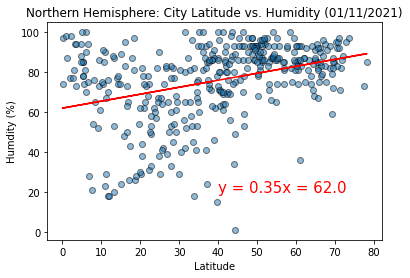

<Figure size 432x288 with 0 Axes>

In [106]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Humidity"]
plt.title(f'Northern Hemisphere: City Latitude vs. Humidity ({today})')
linear_regression(x,y,'Humdity (%)',(40,20))
plt.savefig("output_data/Northern Humidity Linear Regression.png")

There is a weak positive correlation as humidity increases the farther north you go. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.51
The r-value is: 0.2618671805228352
The line equation is: y = 0.56x = 86.68


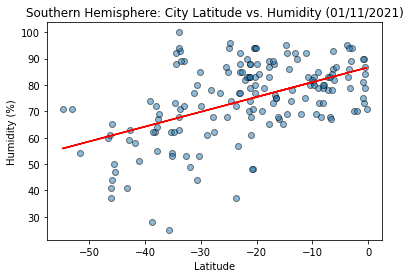

<Figure size 432x288 with 0 Axes>

In [107]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Humidity"]
plt.title(f'Southern Hemisphere: City Latitude vs. Humidity ({today})')
linear_regression(x,y,'Humidity (%)',(-25,20))
plt.savefig("output_data/Southern Humidity Linear Regression.png")

There is a very weak positive correlation between humidity and the southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21
The r-value is: 0.042146449433927785
The line equation is: y = 0.41x = 39.27


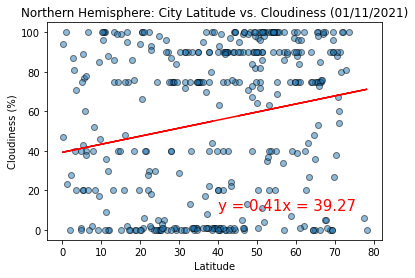

<Figure size 432x288 with 0 Axes>

In [108]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Cloudiness"]
plt.title(f'Northern Hemisphere: City Latitude vs. Cloudiness ({today})')
linear_regression(x,y,'Cloudiness (%)',(40,10))
plt.savefig("output_data/Northern Cloudiness Linear Regression.png")

There is a positive correlation shown in the plot, however the plot also shows cloudiness at all percentages in most of the latitudes. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.24
The r-value is: 0.056165918510928524
The line equation is: y = 0.67x = 69.6


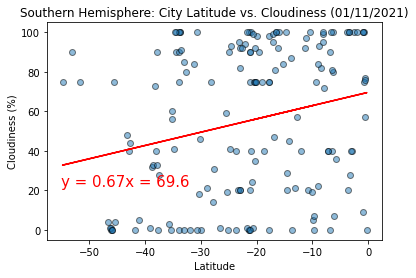

<Figure size 432x288 with 0 Axes>

In [109]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Cloudiness"]
plt.title(f'Southern Hemisphere: City Latitude vs. Cloudiness ({today})')
linear_regression(x,y,'Cloudiness (%)',(-55,22))
plt.savefig("output_data/Southern Cloudiness Linear Regression.png")

There is a positive correlation shown again, however the graph shows again most cloudiness percentages at most of the latitudes. This is also confirmed with the northern hemisphere and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04
The r-value is: 0.001594462400920881
The line equation is: y = 0.01x = 7.87


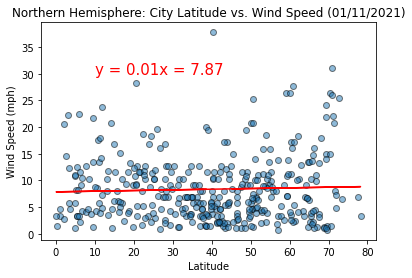

<Figure size 432x288 with 0 Axes>

In [110]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Wind Speed"]
plt.title(f'Northern Hemisphere: City Latitude vs. Wind Speed ({today})')
linear_regression(x,y,'Wind Speed (mph)',(10,30))
plt.savefig("output_data/Northern Wind Speed Linear Regression.png")

There is a very weak correlation between moving north and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.18
The r-value is: 0.0331551635289572
The line equation is: y = -0.08x = 6.69


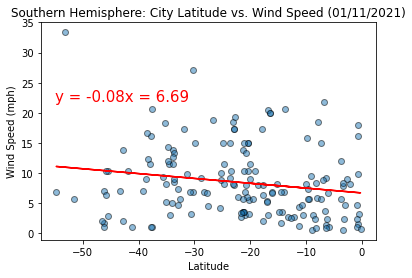

<Figure size 432x288 with 0 Axes>

In [111]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Wind Speed"]
plt.title(f'Southern Hemisphere: City Latitude vs. Wind Speed ({today})')
linear_regression(x,y,'Wind Speed (mph)',(-55,22))
plt.savefig("output_data/Southern Wind Speed Linear Regression.png")

There is a negative correlation between moving farther south from the equator and wind speed. 